In [12]:
# ANN SLP univarient

I need to forecast using only the ANN single-layer perceptron SLP model (considering Close price) concept, not by RNN and LSTM, the 5 days of CLOSE PRICE based on a given TCS dataset with a graph in simple ways

In [13]:
# define problem statement below:

# defineProb_stat

**Objective**

To develop a machine learning model using a single-layer perceptron (SLP) to forecast the closing price of TCS stock for the next 5 days based on historical stock price data.

**Background**

Stock price forecasting is a critical task in financial markets as it helps investors make informed decisions. Traditional methods often rely on complex models such as Recurrent Neural Networks (RNN) or Long Short-Term Memory (LSTM) networks. However, this project aims to demonstrate the use of a simpler model, the Single-Layer Perceptron (SLP), to achieve short-term forecasting.

**Dataset**

The dataset consists of historical stock prices of TCS from Start: 12th June 2023, End: 10th June 2024, source == yahaoo finance.com




---


 ***Steps to Solve***



1.   Data Preprocessing:


*   Convert the date column to a datetime format.
*   Normalize the closing price for easier training of the neural network.


2.   Feature Engineering:



*   LCreate a feature set where each entry consists of the closing prices for the past 5 days.
*   Create a corresponding target set with the closing price of the next day.

3. Model Development:



*   Define a single-layer perceptron model using a neural network framework such as Keras.
*   Train the model on historical data.

4. Forecasting:



*   Use the trained model to forecast the closing prices for the next 5 days.

5. Evaluation:

*   Compare the model's predictions with actual closing prices.
*   Visualize the predicted and actual prices to assess model performance.









# 1: LoadData_PreStep

In [14]:
# Step 1: Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# scalling we considering MinMax, (not standard Z-score)
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# using Sequential, we will create model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense  # layer is using dense

In [15]:
# Step 2: Load the dataset
file_path = '/content/drive/MyDrive/IIIT_Guwahati/ANN_MLP/Yr_22/PrepStep_TCS.2002 sept_NS.csv'
data = pd.read_csv(file_path)

In [16]:
# see data

data

,Date,Open,High,Low,Close,Adj Close,Volume,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,02-09-2002,44.750000,45.974998,44.049999,44.500000,31.293869,2389568,NaN,NaN,3746.449951
1,03-09-2002,44.750000,44.937500,42.000000,42.412498,29.825882,986784,NaN,NaN,3830.399902
2,04-09-2002,41.875000,43.750000,41.387501,43.337502,30.476370,1449856,NaN,NaN,3893.949951
3,05-09-2002,44.662498,44.862499,42.500000,43.075001,30.291769,1061360,NaN,NaN,3858.699951
4,06-09-2002,43.250000,43.250000,41.012501,41.474998,29.166615,907472,NaN,NaN,3852.100098
...,...,...,...,...,...,...,...,...,...,...
5404,12-06-2024,3874.399902,3893.500000,3827.449951,3831.649902,3831.649902,2177001,NaN,NaN,NaN
5405,13-06-2024,3856.800049,3890.000000,3852.000000,3878.149902,3878.149902,1932323,NaN,NaN,NaN
5406,14-06-2024,3889.000000,3889.000000,3828.000000,3832.050049,3832.050049,1860730,NaN,NaN,NaN
5407,18-06-2024,3826.050049,3842.000000,3795.050049,3815.100098,3815.100098,1774045,NaN,NaN,NaN


## s(i) ***delete_unNamed***

In [17]:
# Display the last few columns to inspect them
data.tail()

# If the columns are unnecessary, drop them
data = data.drop(columns=['Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'])

# Check the remaining columns to ensure they are correct
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5409 entries, 0 to 5408
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5409 non-null   object 
 1   Open       5409 non-null   float64
 2   High       5409 non-null   float64
 3   Low        5409 non-null   float64
 4   Close      5409 non-null   float64
 5   Adj Close  5409 non-null   float64
 6   Volume     5409 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 295.9+ KB


In [18]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,02-09-2002,44.750000,45.974998,44.049999,44.500000,31.293869,2389568
1,03-09-2002,44.750000,44.937500,42.000000,42.412498,29.825882,986784
2,04-09-2002,41.875000,43.750000,41.387501,43.337502,30.476370,1449856
3,05-09-2002,44.662498,44.862499,42.500000,43.075001,30.291769,1061360
4,06-09-2002,43.250000,43.250000,41.012501,41.474998,29.166615,907472
...,...,...,...,...,...,...,...
5404,12-06-2024,3874.399902,3893.500000,3827.449951,3831.649902,3831.649902,2177001
5405,13-06-2024,3856.800049,3890.000000,3852.000000,3878.149902,3878.149902,1932323
5406,14-06-2024,3889.000000,3889.000000,3828.000000,3832.050049,3832.050049,1860730
5407,18-06-2024,3826.050049,3842.000000,3795.050049,3815.100098,3815.100098,1774045


## s(ii) convert_into_DateWise

In [19]:
# Step 3: Preprocess the data
# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data.set_index('Date', inplace=True)

## s(iii) Normalize_MinMax

In [ ]:
# Normalize the 'Close' price
scaler = MinMaxScaler(feature_range=(0, 1))
data['Close'] = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# 2: Featue_Engg

In [21]:
# Create feature and target datasets
# We will use the past 5 days' close prices to predict the next day's close price


def create_dataset(dataset, look_back=5):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:i + look_back, 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)


## s(i) dataSplit

In [22]:
look_back = 5
X, Y = create_dataset(data['Close'].values.reshape(-1, 1), look_back)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

# 3: Model_SLP_creating

## s(i) compile_Model

In [23]:
# Step 4: Define the SLP model
# Define the model architecture

model = Sequential()

# take acti funct is linear 1st time, then change to relu

# model.add(Dense(1, input_dim=look_back, activation='linear'))  # input layer

model.add(Dense(1, input_dim=look_back, activation='relu'))  # input layer



# compiliting the model, MSE is loss funct
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

## s(ii) Training_Fit_Model

The verbose parameter in the fit() method of TensorFlow (and other machine learning libraries) controls how much information is displayed during the training process. It affects what you see on the console or output interface while the model is training. Here’s how it works:

Levels of verbose:
verbose=0: Silent mode. Nothing is printed to the console during the training process.

verbose=1: Progress bar mode. It shows an animated progress bar for each epoch, like [=========] 100%.

**verbose=2**: One line per epoch. It includes the progress bar as well as a single line updating with the epoch number and the loss and other metrics.

In [24]:
# Step 5: Train the model

# Train the model on the training data, batch size=1

# 1st trail mai batch = 1 and epoch = 10
# model.fit(X_train, Y_train, epochs=10, batch_size=1, verbose=1)


# increase epoch  and batch sze
history = model.fit(X_train, Y_train, epochs=100, batch_size=16, verbose=1, validation_split=0.2)

Epoch 1/100
217/217 [==============================] - 1s 2ms/step - loss: 9.2272e-05 - accuracy: 2.8918e-04 - val_loss: 3.1109e-04 - val_accuracy: 0.0000e+00
Epoch 2/100
217/217 [==============================] - 0s 2ms/step - loss: 5.2259e-05 - accuracy: 2.8918e-04 - val_loss: 3.0400e-04 - val_accuracy: 0.0000e+00
Epoch 3/100
217/217 [==============================] - 0s 2ms/step - loss: 5.1870e-05 - accuracy: 2.8918e-04 - val_loss: 2.9944e-04 - val_accuracy: 0.0000e+00
Epoch 4/100
217/217 [==============================] - 1s 3ms/step - loss: 5.1164e-05 - accuracy: 2.8918e-04 - val_loss: 2.9681e-04 - val_accuracy: 0.0000e+00
Epoch 5/100
217/217 [==============================] - 0s 2ms/step - loss: 5.0655e-05 - accuracy: 2.8918e-04 - val_loss: 2.9350e-04 - val_accuracy: 0.0000e+00
Epoch 6/100
217/217 [==============================] - 0s 2ms/step - loss: 5.1034e-05 - accuracy: 2.8918e-04 - val_loss: 2.9222e-04 - val_accuracy: 0.0000e+00
Epoch 7/100
217/217 [=========================

## s(iii) show_TrainVal

In [25]:
# Assuming `history` is in training history object, numeric value in the form of e (maths symbol) = 2.718

# Print the last epoch's metrics
print("Last epoch metrics:")
print(f"Train Loss: {history.history['loss'][-1]}")
print(f"Train Accuracy: {history.history['accuracy'][-1]}")
print(f"Validation Loss: {history.history['val_loss'][-1]}")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]}")

# Print the best metrics during training
best_val_loss = min(history.history['val_loss'])
best_val_loss_epoch = history.history['val_loss'].index(best_val_loss)
print("\nBest validation loss:")
print(f"Epoch: {best_val_loss_epoch + 1}")
print(f"Validation Loss: {best_val_loss}")

best_val_acc = max(history.history['val_accuracy'])
best_val_acc_epoch = history.history['val_accuracy'].index(best_val_acc)
print("\nBest validation accuracy:")
print(f"Epoch: {best_val_acc_epoch + 1}")
print(f"Validation Accuracy: {best_val_acc}")


Last epoch metrics:
Train Loss: 1.7484841009718366e-05
Train Accuracy: 0.0002891845069825649
Validation Loss: 9.913884423440322e-05
Validation Accuracy: 0.0

Best validation loss:
Epoch: 100
Validation Loss: 9.913884423440322e-05

Best validation accuracy:
Epoch: 1
Validation Accuracy: 0.0


In [31]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Format and print the values
print(f"Training loss: The training loss is {train_loss:.4f}.")
print(f"Training accuracy: The training accuracy is {train_accuracy:.5f}.")
print(f"Validation loss: The validation loss is {val_loss:.4f}.")
print(f"Validation accuracy: The validation accuracy is {val_accuracy:.1%}, which might indicate that the model is not performing well on unseen validation data.")

Training loss: The training loss is 0.0000.
Training accuracy: The training accuracy is 0.00029.
Validation loss: The validation loss is 0.0001.
Validation accuracy: The validation accuracy is 0.0%, which might indicate that the model is not performing well on unseen validation data.


# 4: Predications

In [27]:
# Step 6: Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions back to original scale
train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))
Y_train = scaler.inverse_transform(Y_train.reshape(-1, 1))
Y_test = scaler.inverse_transform(Y_test.reshape(-1, 1))


34/34 [==============================] - 0s 1ms/step


## s(i) Next_5days

In [28]:
# Step 7: Forecast next 5 days

last_close_prices = data['Close'][-look_back:].values

forecast = []
for _ in range(5):
    next_close = model.predict(last_close_prices.reshape(1, -1))
    forecast.append(next_close[0, 0])
    last_close_prices = np.append(last_close_prices[1:], next_close)

forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))


1/1 [==============================] - 0s 26ms/step


## s(ii) plot

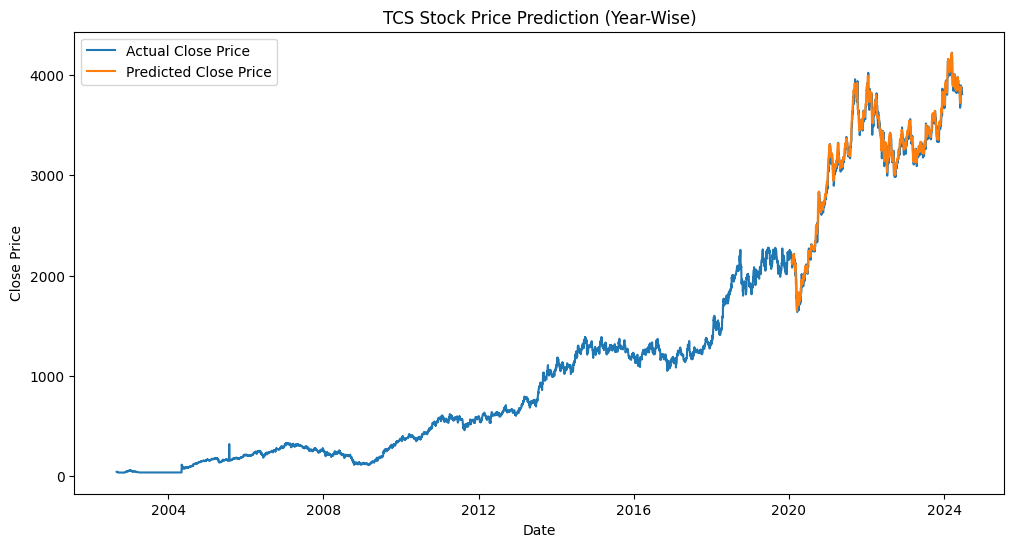

In [48]:
# Plot the results
plt.figure(figsize=(12, 6))


plt.plot(data.index, scaler.inverse_transform(data['Close'].values.reshape(-1, 1)), label='Actual Close Price')
plt.plot(data.index[len(Y_train):len(Y_train)+len(Y_test)], test_predict, label='Predicted Close Price')


# plt.plot(data.index[-len(forecast):], forecast, label='Forecasted Close Price', linestyle='dashed')

plt.title('TCS Stock Price Prediction (Year-Wise)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


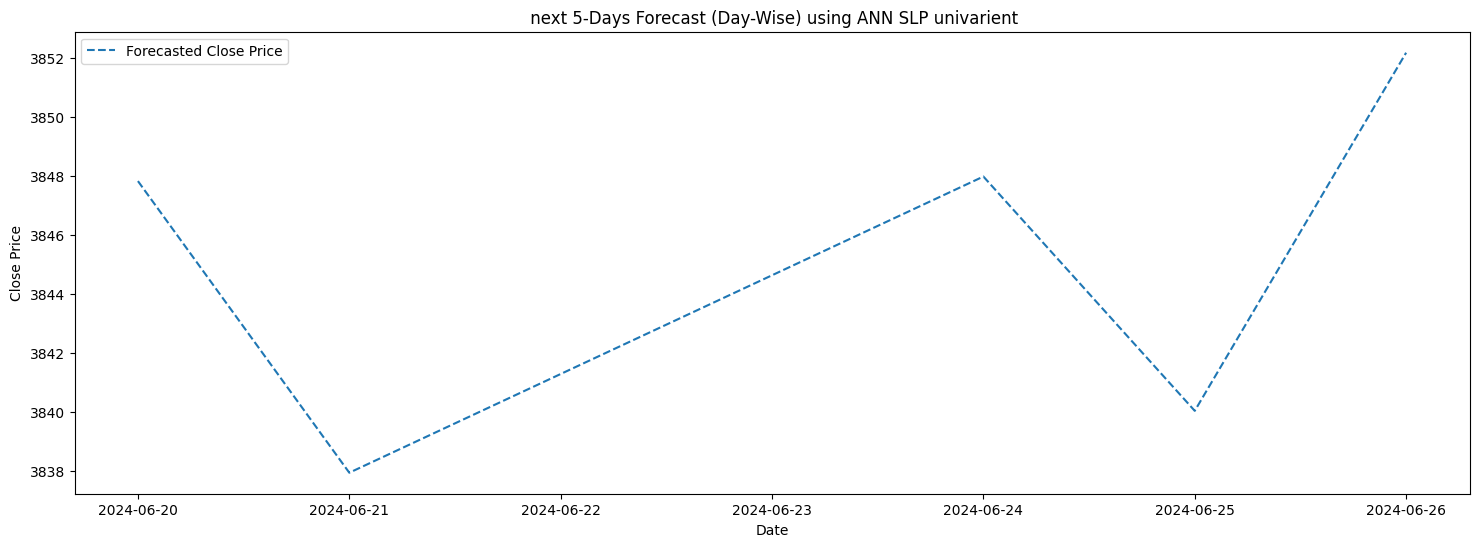

In [46]:
# plot of only 5 days which is predicated

plt.figure(figsize=(18, 6))

forecast_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=5, freq='B')  # Generate next 5 business days
plt.plot(forecast_dates, forecast.flatten(), label='Forecasted Close Price', linestyle='dashed')

plt.title(' next 5-Days Forecast (Day-Wise) using ANN SLP univarient')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


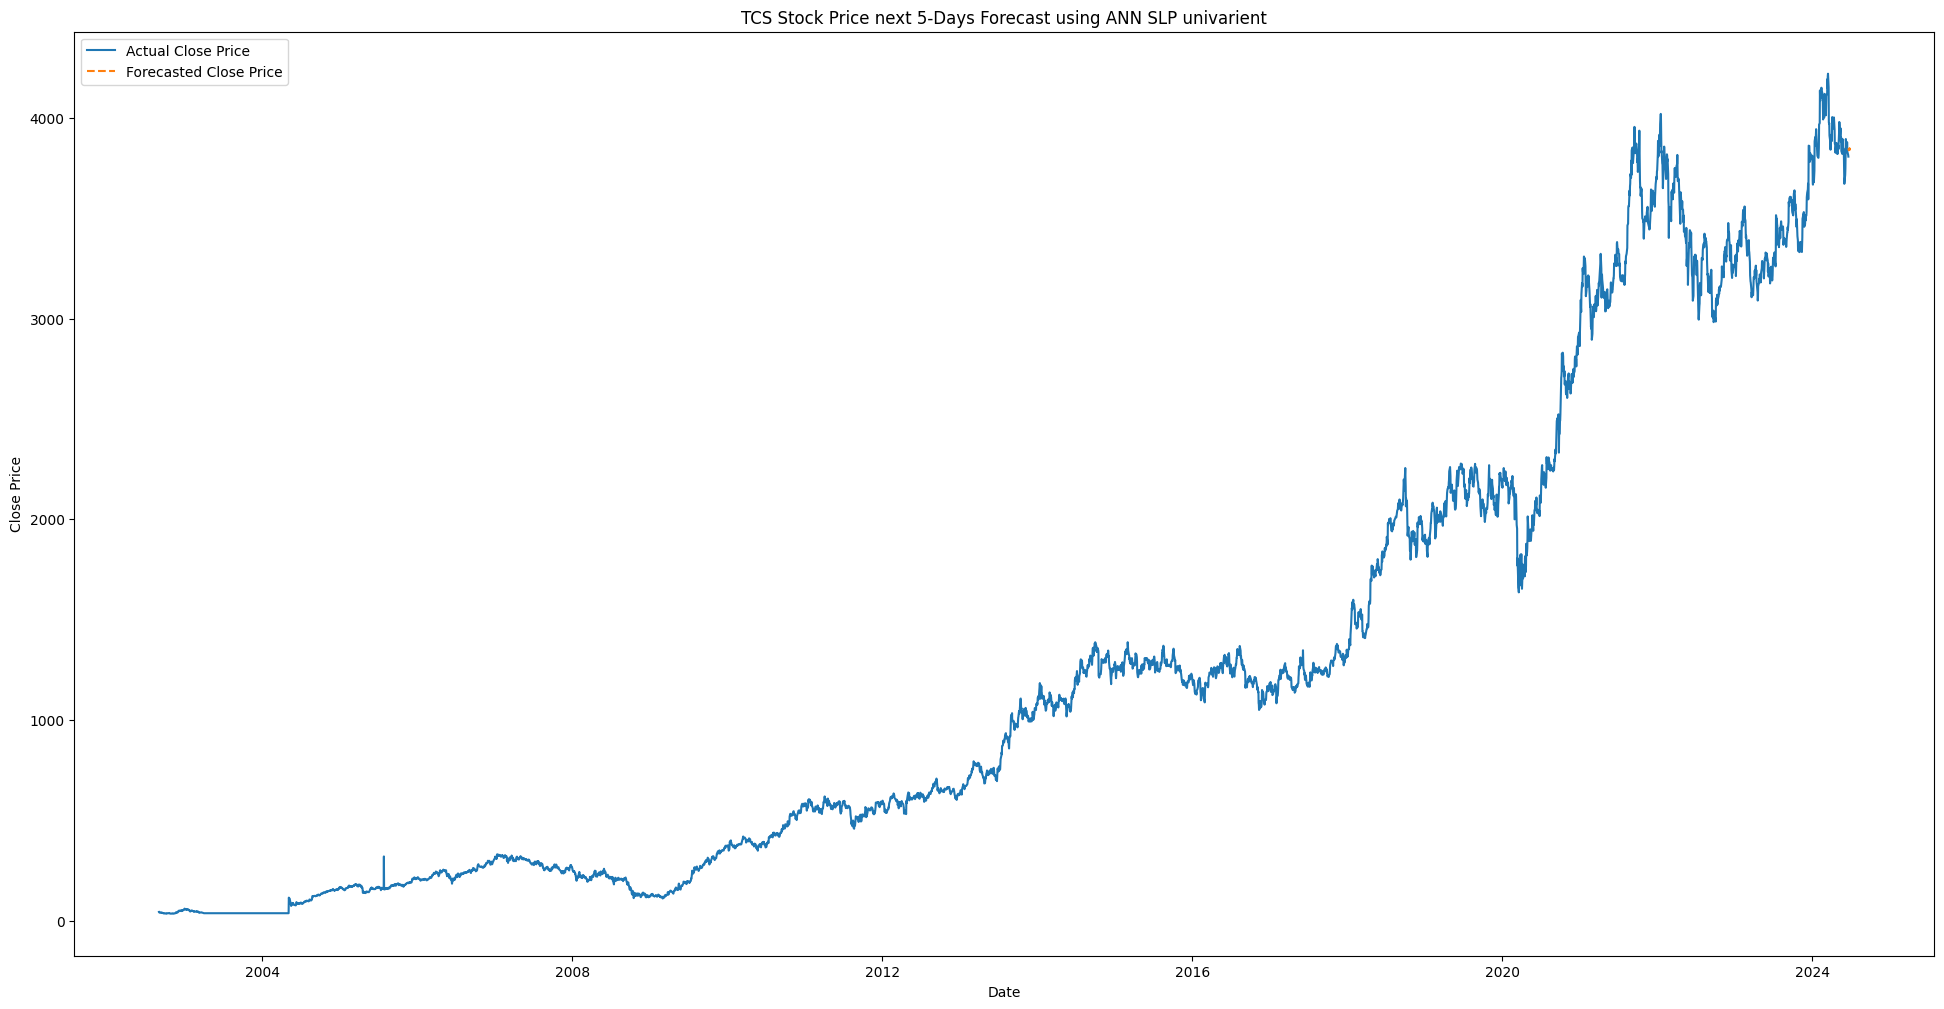

In [47]:
# Plot forecast


forecast_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=5, freq='B')  # Generate next 5 business days

# resize graph photo
plt.figure(figsize=(24, 12))

plt.plot(data.index, scaler.inverse_transform(data['Close'].values.reshape(-1, 1)), label='Actual Close Price')
plt.plot(forecast_dates, forecast.flatten(), label='Forecasted Close Price', linestyle='dashed')  # Flatten the forecast array



plt.title('TCS Stock Price next 5-Days Forecast using ANN SLP univarient')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


## s(iii) print_NumerbForm_forcastedVal

In [45]:
# Print the forecasted values for the next 5 days


import pandas as pd
import numpy as np  # Import NumPy for array manipulation

forecast_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=5, freq='B')
forecast_values = np.array(forecast).flatten()  # Convert list to NumPy array and flatten

for date, value in zip(forecast_dates, forecast_values):
    print(f"{date.date()}: {value:.2f}")

2024-06-20: 3847.83
2024-06-21: 3837.95
2024-06-24: 3847.98
2024-06-25: 3840.05
2024-06-26: 3852.17


***all in one enjoying*** ⏰

Last Close Prices (scaled): [0.90734807 0.91846343 0.90744372 0.903392   0.90131231]
1/1 [==============================] - 0s 38ms/step
Next Close (scaled): [[0.9112147]]
1/1 [==============================] - 0s 66ms/step
Next Close (scaled): [[0.90885407]]
1/1 [==============================] - 0s 44ms/step
Next Close (scaled): [[0.9112515]]
1/1 [==============================] - 0s 30ms/step
Next Close (scaled): [[0.90935504]]
1/1 [==============================] - 0s 78ms/step
Next Close (scaled): [[0.91225374]]
2024-06-20: 3847.83
2024-06-21: 3837.95
2024-06-24: 3847.98
2024-06-25: 3840.05
2024-06-26: 3852.17


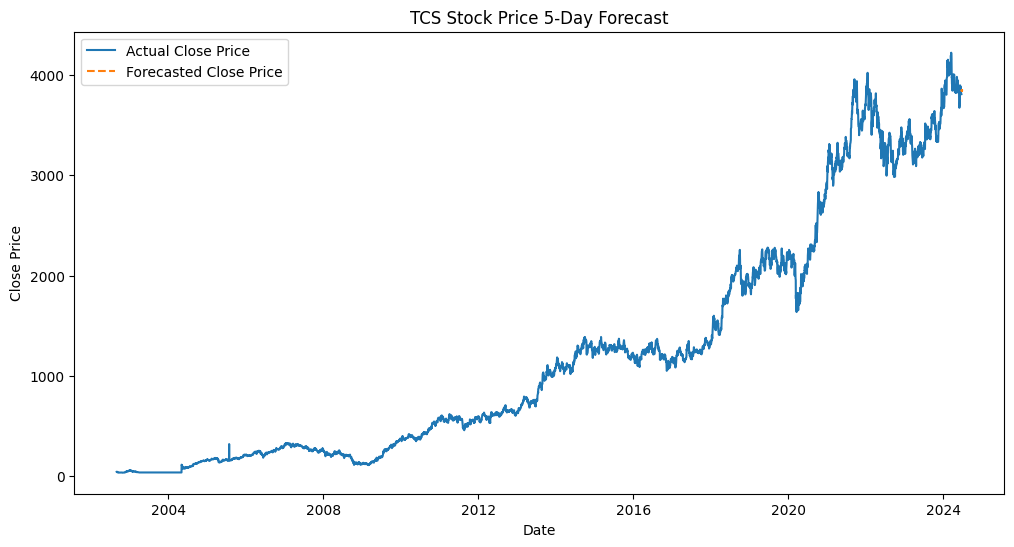

In [44]:
# Step 7: Forecast next 5 days
last_close_prices = data['Close'][-look_back:].values
print("Last Close Prices (scaled):", last_close_prices)  # Print to check values

forecast = []
for _ in range(5):
    next_close = model.predict(last_close_prices.reshape(1, -1))
    print("Next Close (scaled):", next_close)  # Print to check predictions
    forecast.append(next_close[0, 0])
    last_close_prices = np.append(last_close_prices[1:], next_close)

forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

# Print the forecasted values for the next 5 days
forecast_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=5, freq='B')
forecast_values = forecast.flatten()

for date, value in zip(forecast_dates, forecast_values):
    print(f"{date.date()}: {value:.2f}")

# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(data.index, scaler.inverse_transform(data['Close'].values.reshape(-1, 1)), label='Actual Close Price')
plt.plot(forecast_dates, forecast_values, label='Forecasted Close Price', linestyle='dashed')  # Use forecast_values directly
plt.title('TCS Stock Price 5-Day Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


## s(iv) wholeData_PredictClose

In [ ]:
# Create an array for the whole dataset prediction

dataset_predict = np.empty_like(data['Close'].values)
dataset_predict[:] = np.nan
dataset_predict[look_back:len(train_predict) + look_back] = train_predict.flatten()

# Subtract an additional look_back to get the correct starting index
dataset_predict[len(train_predict) + (look_back * 2) - look_back:len(data)] = test_predict.flatten()



# Plot the results
plt.figure(figsize=(20, 10))
plt.plot(data.index, scaler.inverse_transform(data['Close'].values.reshape(-1, 1)), label='Actual Close Price')
plt.plot(data.index, dataset_predict, label='Predicted Close Price', linestyle='dashed')
plt.title('TCS Stock Price Forecast (Close Price TRENDS) from 2002 to 2024')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()